In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

In [ ]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/dataset",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
validation_dataset = test.flow_from_directory("/content/drive/MyDrive/dataset",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 219 images belonging to 2 classes.
Found 219 images belonging to 2 classes.


In [ ]:
validation_dataset.class_indices

{'Keyboard': 0, 'bottle': 1}

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation='relu'))

model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit_generator(train_dataset,
         steps_per_epoch = 5,
         epochs = 10,
         validation_data = validation_dataset
         )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
3/5 [=================>............] - ETA: 3s - loss: 0.9965 - accuracy: 0.5104

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


5/5 [==============================] - 12s 2s/step - loss: 0.8695 - accuracy: 0.5226 - val_loss: 0.6512 - val_accuracy: 0.5479
Epoch 2/10
5/5 [==============================] - 11s 2s/step - loss: 0.4790 - accuracy: 0.7806 - val_loss: 0.2049 - val_accuracy: 0.9680
Epoch 3/10
5/5 [==============================] - 11s 2s/step - loss: 0.1022 - accuracy: 0.9742 - val_loss: 0.0136 - val_accuracy: 0.9954
Epoch 4/10
5/5 [==============================] - 11s 2s/step - loss: 0.0666 - accuracy: 0.9806 - val_loss: 0.0086 - val_accuracy: 0.9954
Epoch 5/10
5/5 [==============================] - 11s 2s/step - loss: 0.1028 - accuracy: 0.9871 - val_loss: 3.6752e-04 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 12s 2s/step - loss: 0.0535 - accuracy: 0.9937 - val_loss: 0.0875 - val_accuracy: 0.9772
Epoch 7/10
5/5 [==============================] - 11s 2s/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.1111 - val_accuracy: 0.9726
Epoch 8/10
5/5 [=========================

In [ ]:
model.save("model.h5")

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
filename = "/content/drive/MyDrive/dataset"
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1: 
        plt.xlabel("Bottle",fontsize=30)
    elif val == 0:
        
        plt.xlabel("Keyboard",fontsize=30)

[[0.]]


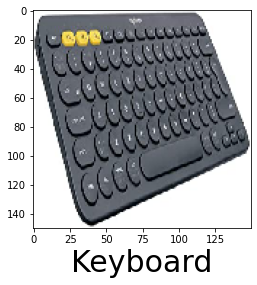

In [ ]:
predictImage('/content/drive/MyDrive/dataset/Keyboard/617zMW8uyYL._AC_SX466_.jpg')

[[1.]]


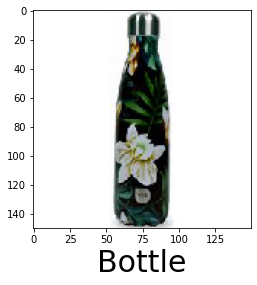

In [ ]:
predictImage("/content/drive/MyDrive/dataset/bottle/images (37).jpeg")

In [ ]:
model.evaluate_generator(train_dataset)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.017843421548604965, 0.990867555141449]

In [ ]:
model.evaluate_generator(validation_dataset)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.017843423411250114, 0.990867555141449]